# Protocoles de routage

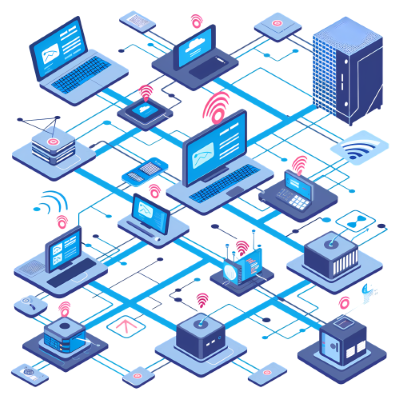
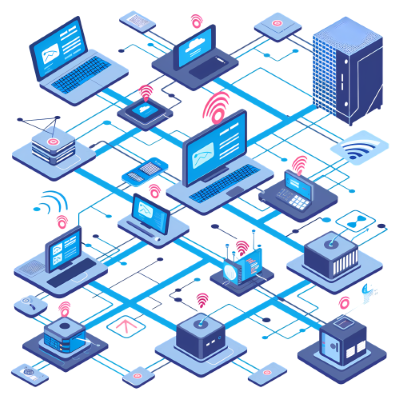

---
## Rappels de première


### Vocabulaire
- Pour raccorder plusieurs ordinateurs entre eux, on utilise un **commutateur** ou **switch** et des câbles **Ethernet** avec prises **RJ45**, ce réseau sera appelé **réseau local**.

- Pour raccorder plusieurs réseaux locaux entre eux, on utilise un **routeur**.


### Adressage réseau

**Adresse IP**

- Les adresses IP sont de la forme : `a.b.c.d` quatre nombres codés sur **1 octet** donc compris entre 0 et 255. (ex: `192.168.0.1`)  

**La commande `ping`**
`ping` est une commande informatique permettant de tester l'accessibilité d'une autre machine à travers un réseau IP. La commande mesure également le temps mis pour recevoir une réponse, appelé round-trip time (temps aller-retour).  

_Exemples :_
- **Sous Windows** :
```
C:\Users\ex>ping 172.217.20.163
Envoi d’une requête 'Ping'  172.217.20.163 avec 32 octets de données :
Réponse de 172.217.20.163 : octets=32 temps=12 ms TTL=116
Réponse de 172.217.20.163 : octets=32 temps=12 ms TTL=116
Réponse de 172.217.20.163 : octets=32 temps=12 ms TTL=116
Réponse de 172.217.20.163 : octets=32 temps=12 ms TTL=116

Statistiques Ping pour 172.217.20.163:
    Paquets : envoyés = 4, reçus = 4, perdus = 0 (perte 0%),
Durée approximative des boucles en millisecondes :
    Minimum = 12ms, Maximum = 12ms, Moyenne = 12ms



C:\Users\ex>ping 192.160.0.4
Envoi d’une requête 'Ping'  192.160.0.4 avec 32 octets de données :
Délai d’attente de la demande dépassé.
Délai d’attente de la demande dépassé.
Délai d’attente de la demande dépassé.
Délai d’attente de la demande dépassé.

Statistiques Ping pour 192.160.0.4:
    Paquets : envoyés = 4, reçus = 0, perdus = 4 (perte 100%),

```

- **Sous Linux** :
```
ex@M1 ~ % ping  172.217.20.163
Envoi d’une requête 'Ping'  172.217.20.163 avec 32 octets de données :
Réponse de 172.217.20.163 : octets=32 temps=14 ms TTL=116
Réponse de 172.217.20.163 : octets=32 temps=14 ms TTL=116
Réponse de 172.217.20.163 : octets=32 temps=12 ms TTL=116
Réponse de 172.217.20.163 : octets=32 temps=12 ms TTL=116

Statistiques Ping pour 172.217.20.163:
    Paquets : envoyés = 4, reçus = 4, perdus = 0 (perte 0%),
Durée approximative des boucles en millisecondes :
    Minimum = 12ms, Maximum = 14ms, Moyenne = 13ms



ex@M1 ~ % ping 192.168.0.4
Envoi d’une requête 'Ping'  192.168.0.4 avec 32 octets de données :
Réponse de 192.168.1.254 : Impossible de joindre l’hôte de destination.
Réponse de 192.168.1.254 : Impossible de joindre l’hôte de destination.
Réponse de 192.168.1.254 : Impossible de joindre l’hôte de destination.
Réponse de 192.168.1.254 : Impossible de joindre l’hôte de destination.

Statistiques Ping pour 192.168.0.4:
    Paquets : envoyés = 4, reçus = 4, perdus = 0 (perte 0%),
```



**Adresse réseau**

- Une partie de l’adresse IP permet d’identifier le réseau auquel appartient la machine et l’autre partie de l’adresse IP permet d’identifier la machine sur ce réseau.  
Par exemple pour un ordinateur ayant pour adresse IP `192.168.2.25`, si la partie `192.168` permet d’identifier le réseau (on dit que la machine appartient au réseau ayant pour adresse `192.168.0.0`, pour trouver l'adresse réseau il suffit de remplacer la partie "machine" de cette adresse IP par un ou des 0) et la partie `2.25` permettra d’identifier la machine sur le réseau.

- Toutes les machines appartenant au même réseau devront posséder la même adresse réseau (sinon elles ne pourront pas communiquer ensemble, même si elles sont bien physiquement reliées).  
  
**Masque de sous-réseau**

- Attention, les adresses IP (`a.b.c.d`) n’ont forcément pas les parties `a` et `b` consacrées à l’identification du réseau et les parties `c` et `d` consacrées à l’identification des machines sur le réseau.  

- Dans la notation **CIDR** (**C**lassless **I**nter **D**omain **R**outing), on rajoute à l'adresse IP un "`/`" suivi du nombre `8`, `16` ou `24` qui correspondra au nombre de bits qui identifieront l'adresse réseau, ce nombre est appelé le **masque de sous réseau** :
    - Dans l'adresse `a.b.c.d/8` seule la partie `a` est consacrée à l'adresse réseau, le reste est consacré à la partie machine de l'adresse IP. On aura donc une adresse réseau de la forme `a.0.0.0`
    - Dans l'adresse `a.b.c.d/16` les parties `a` et `b` sont consacrées à l'adresse réseau, le reste est consacré à la partie machine de l'adresse IP. On aura donc une adresse réseau de la forme `a.b.0.0`
    - Dans l'adresse `a.b.c.d/24`, les parties `a`, `b` et `c` sont consacrées à l'adresse réseau, le est consacré à la partie machine de l'adresse IP. On aura donc une adresse réseau de la forme `a.b.c.0`
    - Il est même possible d'avoir autre chose que /8, /16 ou /24 (on peut par exemple trouver /10 ou /17...), mais ces cas ne sont pas au programme de NSI.

- On peut aussi noter le masque de sous réseau sous la forme d'une adresse IP, appelée **notation décimale pointée** : 
    - Le masque `255.0.0.0` indique que seul le premier octet identifie le réseau, il équivaut à la notation `/8`
    - Le masque `255.255.0.0` indique que seul le premier octet identifie le réseau, il équivaut à la notation `/16`
    - Le masque `255.255.255.0` indique que seul le premier octet identifie le réseau, il équivaut à la notation `/24`

**Nombre de machines et adresses réservées**

- La taille du masque de sous réseau va donc influencer le nombre de machines qui pourront être adressées dans le réseau.

- Dans un réseau, certaines adresses IP sont réservées et ne peuvent pas être utilisées :
    - L'adresse `0` qui correspond à **l'adresse du réseau** (`192.168.1.0/24` ou `25.0.0.0/8` par exemple)
    - La dernière adresse du réseau (qui a tous les octets de la partie machine à 255 soit tous les bits à 1) : c'est ce qu'on appelle **l'adresse de broadcast** ou **adresse de diffusion** qui permet d'envoyer des données vers toutes les machines du réseau. (`192.167.24.255/24`, `172.28.255.255/16` ou  `4.255.255.255/8` par exemple)

---
### 📝 EXERCICE 1 - Adresses IP et réseaux

---
## Routage des paquets

Un routeur permet de relier ensemble plusieurs réseaux locaux. Il est donc composé d’un nombre plus ou moins important d’interfaces réseau (cartes réseau). Les routeurs les plus simples que l’on puisse rencontrer permettent de relier ensemble deux réseaux (ils possèdent alors 2 interfaces réseau), mais il existe des routeurs capables de relier ensemble une dizaine de réseaux.  
Pour rappel, **Internet** résulte de l'interconnexion de réseaux par des routeurs.  

### Exemple de réseau
Soit le réseau suivant :

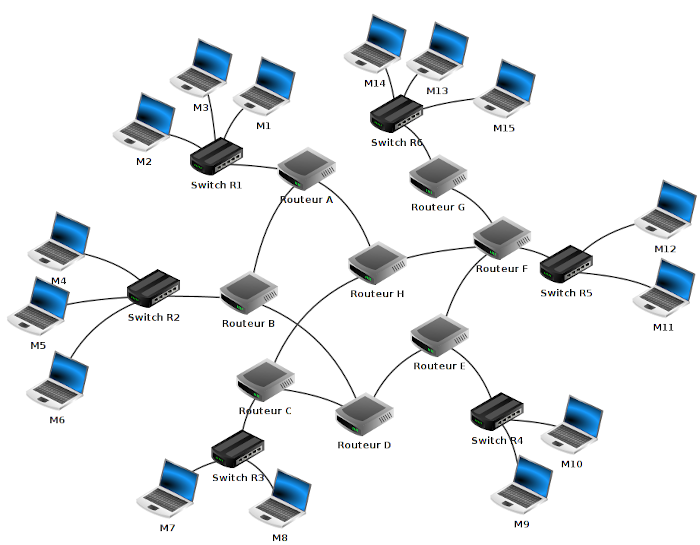

Nous avons 6 réseaux locaux, chaque réseau local possède son propre switch.

Les ordinateurs M1, M2 et M3 appartiennent au réseau local **1**.  
Les ordinateurs M4, M5 et M6 appartiennent au réseau local **2**.  
Les ordinateurs M7 et M8 appartiennent au réseau local **3**.  
Les ordinateurs M9 et M10 appartiennent au réseau local **4**.  
Les ordinateurs M11 et M12 appartiennent au réseau local **5**.  
Les ordinateurs M13, M14 et M15 appartiennent au réseau local **6**.  

Prenons quelques exemples de communications entre 2 ordinateurs :

### M1 veut communiquer avec M3
Le paquet est envoyé de M1 vers le switch R1, R1 "constate" que M3 se trouve bien dans le réseau local 1, le paquet est donc envoyé directement vers M3. On peut résumer le trajet du paquet par :
$$M1 → Switch R1 → M3$$

### M1 veut communiquer avec M6
Le paquet est envoyé de M1 vers le switch R1, R1 « constate » que M6 n’est pas sur le réseau local 1, R1 envoie donc le paquet vers le routeur A. Le routeur A n'est pas connecté directement au réseau localR2 (réseau local de la machine M6), mais il "sait" que le routeur B est connecté au réseau local 2. Le routeur A envoie le paquet vers le routeur B. Le routeur B est connecté au réseau local 2, il envoie le paquet au Switch R2. Le Switch R2 envoie le paquet à la machine M6.
$$M1 → Switch R1 → Routeur A → Routeur B → Switch R2 → M6$$

### M1 veut communiquer avec M9
En suivant la même démarche on peut obtenir le chemin :
$$M1 → Switch R1 → Routeur A → Routeur B → Routeur D → Routeur E → Switch R4 → M9$$

Le chemin donné ci-dessus n’est pas l’unique possibilité, en effet on aurait pu aussi avoir :
$$M1 → Switch R1 → Routeur A → Routeur H → Routeur F → Routeur E → Switch R4 → M9$$

Il est très important de bien comprendre qu’il existe souvent **plusieurs chemins possibles** pour relier 2 ordinateurs


### M13 veut communiquer avec M9
Nous pouvons avoir 
$$M13 → Switch R6 → Routeur G → Routeur F → Routeur E → Switch R4 → M9$$
ou encore 
$$M13 → Switch R6 → Routeur G → Routeur F → Routeur H → Routeur C → Routeur D → Routeur E → Switch R4 → M9$$


>💡On pourrait penser que le chemin passant par les routeurs F puis E est plus rapide et donc préférable au chemin passant par les routeurs F puis H puis C puis D puis E, cela est sans doute vrai, mais imaginez qu’il y ait un problème technique entre le Routeur F et le Routeur E, l’existence d'un chemin alternatif permettra tout de même d’établir une communication entre M13 et M9.

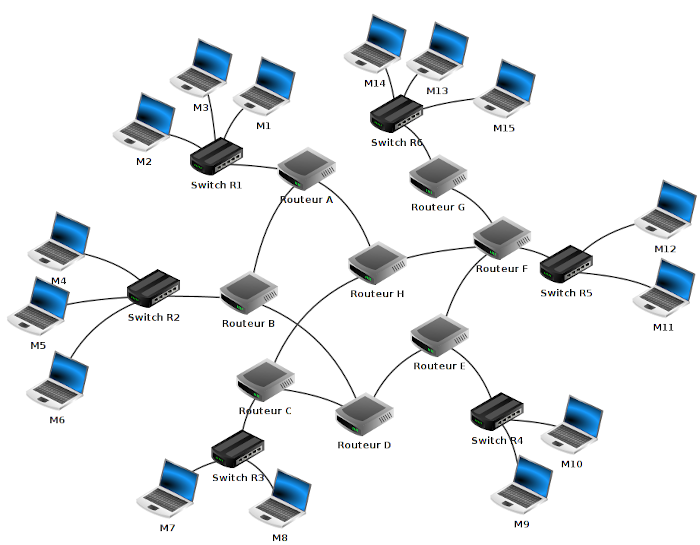

### Tables de routage
Dans notre second exemple, M1 veut communiquer avec M6, lors de l'établissement de la communication, le switch R1 va constater que M6 n'appartient pas au réseau local (grâce à son adresse IP et au masque de sous réseau), il va donc envoyer le paquet de données vers le routeur A. C'est donc au routeur A de gérer la problématique _"Comment atteindre M6 ?"_  

Chaque routeur possède une **table de routage** qui peut être vue comme un tableau qui va contenir des informations permettant au routeur d'envoyer le paquet de données dans la "bonne direction".  

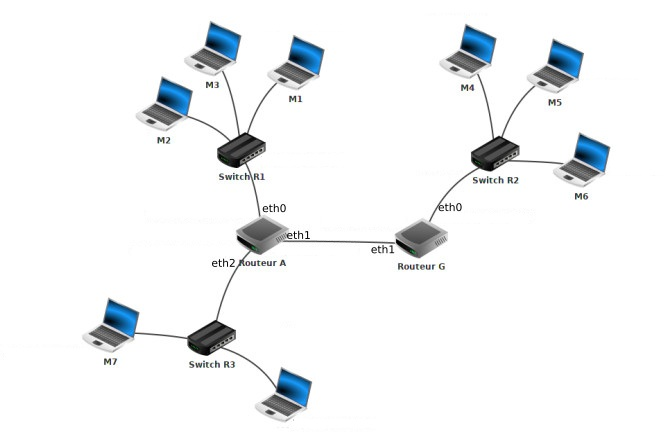

Sur le schéma ci-dessus, nous avons 2 routeurs :
- Le routeur A qui possède 3 interfaces réseau que l'on nomme eth0, eth1 et eth2.  
- Le routeur G qui possède 2 interfaces réseau que l'on nomme eth0 et eth1.


Voici les informations présentes dans la table de routage de A :
- Le routeur A est directement relié au réseau "R1" par l'intermédiaire de son interface eth0
- Le routeur A est directement relié au réseau "R3" par l'intermédiaire de son interface eth2
- Le routeur A est directement relié au Routeur G par l'intermédiaire de son interface eth1
- Le routeur A n'est pas directement relié au réseau "R2" mais il "sait" que les paquets à destination de ce réseau doivent être envoyé au routeur G qui est directement relié au réseau "R2")

Ces informations peuvent être résumées dans un tableau (appelé **table de routage simplifiée**) :

| Réseau      | Moyen de l'atteindre  |
| :---------- | :---------- |
| réseau R1 | eth0 |
| réseau R3 | eth2 |
| réseau routeur G | eth1 |
| réseau R2 | routeur G |

On peut traduire ce tableau par :
- pour atteindre le réseau R1, on doit "sortir" du routeur par eth0 (le réseau R1 est directement relié au routeur A)
- pour atteindre le réseau R3, on doit "sortir" du routeur par eth2 (le réseau R3 est directement relié au routeur A)
- pour atteindre le routeur G, on doit "sortir" du routeur par eth1 (le routeur G est directement relié au routeur A)
- pour atteindre le réseau R2, on doit "envoyer" le paquet de données vers le routeur G qui "saura quoi faire avec" (le réseau R2 n'est pas directement relié au routeur A)

  

### Comment un routeur arrive à remplir sa table de routage ?

Pour les réseaux qui sont directement reliés au routeur c'est automatique, mais pour les autres réseaux, il existe 2 méthodes :

- Le routage **statique** : chaque ligne doit être renseignée "à la main". Cette solution est seulement envisageable pour des très petits réseaux de réseaux.
- Le routage **dynamique** : tout se fait automatiquement, on utilise des protocoles qui vont permettre de découvrir les différentes routes automatiquement afin de pouvoir remplir la table de routage tout aussi automatiquement.

### Protocoles de routage

Un réseau de réseaux comportant des routeurs peut être modélisé par un graphe : chaque routeur est un sommet et chaque liaison entre les routeurs ou entre un routeur et un switch est une arête. Les algorithmes utilisés par les protocoles de routages sont donc des algorithmes issus de la théorie de graphes.  

On trouve plusieurs protocoles de routage. Cette année, nous allons en étudier deux : RIP et OSPF.

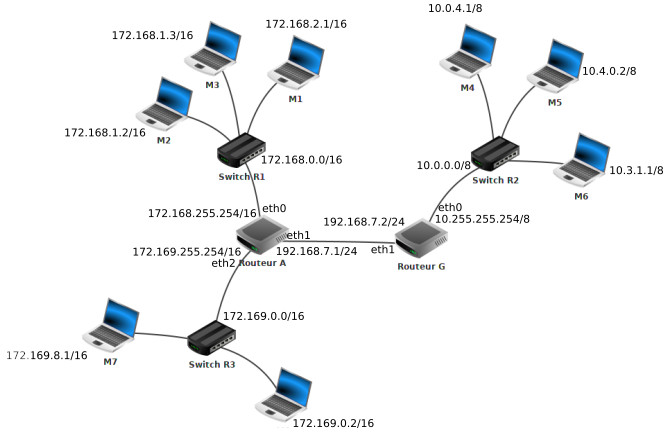

---
## Le protocole RIP (Routing Information Protocol)

### Description
Le protocole RIP s'appuie sur l'algorithme de **Bellman-Ford** (algorithme qui permet de calculer les plus courts chemins dans un graphe) et mentionnera dans une colonne "Métrique" le nombre de routeurs à traverser pour atteindre la destination.  

Prenons l'exemple de réseau suivant :  
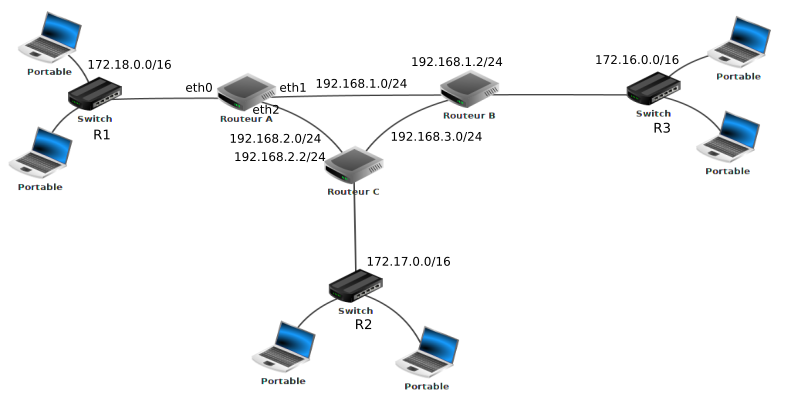

Établissons la table de routage du routeur A en nous basant sur le protocole RIP :
- Il est directement relié au réseau R1 par eth0.
- Il est directement relié au routeur B par eth1
- Il est directement relié au routeur C par eth2
- Il  n'est pas directement relié au réseau R2 mais par contre il "sait" qu'il peut l'atteindre soit en passant par le routeur C (adresse 192.168.2.2/24) en une étape ou soit en passant par le routeur B (adresse 192.168.1.2/24) en deux étapes (B puis C)
- Il n'est pas directement relié au réseau R3 mais il "sait" qu'il peut l'atteindre soit en passant par le routeur B (192.168.1.2/24) en une étape ou soit en passant par le routeur C (192.168.2.2/24) en deux étapes (C puis B)

Ce qui nous donnera donc la **table de routage simplifiée du routeur A** suivante :

| Réseau      | Moyen de l'atteindre  | Métrique  |
| :---------- | :---------- | :---------- |
|R1|eth0|0|
|Routeur B|eth1|0|
|Routeur C|eth2|0|
|R2|Routeur C|1|
|R2|Routeur B|2|
|R3|Routeur B|1|
|R3|Routeur C|2|

Dans ce tableaux, la colonne "Métrique" correspondra donc au nombre d'étapes pour atteindre la destitantion par le chemin choisi.  

On nomme parfois le moyen de l'atteindre **passerelle** et il arrive que l'on note son adresse IP au lieu de son nom, ce qui nous donnerait pour notre exemple :  

| Réseau      | Passerelle  | Métrique  |
| :---------- | :---------- | :---------- |
|R1|eth0|0|
|Routeur B|eth1|0|
|Routeur C|eth2|0|
|R2|192.168.2.2/24|1|
|R2|192.168.1.2/24|2|
|R3|192.168.1.2/24|1|
|R3|192.168.2.2/24|2|



### Choix du plus court chemin
Avec le protocole RIP, on choisira le plus court chemin pour se faire transiter les données soit **le plus petit nombre de routeurs traversés**.  

- Pour un paquet de données allant de R1 à R2, la route privilégiée sera donc : $R1 -> Routeur A -> Routeur C -> R2$. Mais en cas de problème (panne ntre A et C par ex.) la route $R1 -> Routeur A -> Routeur B -> Routeur C -> R2$ sera possible.
- Pour un paquet de données allant de R1 à R3, la route privilégiée sera donc : $R1 -> Routeur A -> Routeur B -> R3$. Mais en cas de problème la route $R1 -> Routeur A -> Routeur C -> Routeur B -> R3$ sera possible.

Le protocole RIP est aujourd'hui très rarement utilisé dans les grandes infrastructures. En effet, il génère, du fait de l'envoi périodique de message, un trafic réseau important (surtout si les tables de routages contiennent beaucoup d'entrées). De plus, le protocole RIP est limité à 15 sauts (on traverse au maximum 15 routeurs pour atteindre sa destination). On lui préfèrera donc souvent le protocole OSPF.

> **⚠️ Dans les exercices, les tables de routages peuvent-être construites de manières différentes et faire apparaitre les liaisons entre les routeurs uniquement. Il est important de bien lire la consigne, les exemples et les conventions adoptées par chaque exercice.** 
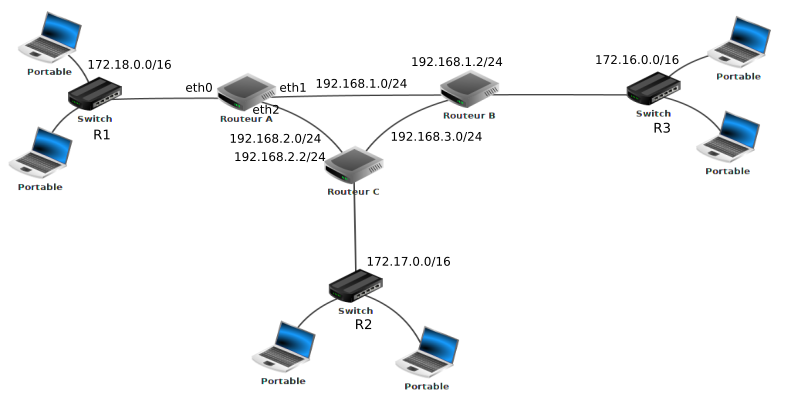

---
### 📝 EXERCICE 2 - Protocole RIP

---
## Le protocole OSPF (Open Shortest Path First)

Contrairement à RIP, OSPF n'utilise pas le "nombre de sauts nécessaire" pour établir la métrique, mais la notion de "**coût des routes**". Dans les messages échangés par les routeurs on trouve le coût de chaque liaison (plus le coût est grand et moins la liaison est intéressante). Quand on parle de "liaison" on parle simplement du câble qui relie un routeur à un autre routeur. Le protocole OSPF permet de connaitre le coût de chaque liaison entre routeurs, et donc, de connaitre le coût d'une route (en ajoutant le coût de chaque liaison traversée). On notera que pour effectuer ces calculs, le protocole OSPF s'appuie sur l'algorithme de Dijkstra.

### Comment calculer ce coût ?

La notion de coût est directement liée au débit des liaisons entre les routeurs. Le débit correspond au nombre de bits de données qu'il est possible de faire passer dans un réseau par seconde. Le débit est donc donné en **bits par seconde** (bps), mais on trouve souvent des **kilo bits par seconde** (kbps) ou encore des **méga bits par seconde** (Mbps)  => 1 kbps = 1000 bps et 1 Mbps = 1000 kbps = $10^6$ bps.  
Connaissant le débit d'une liaison, il est possible de calculer le coût d'une liaison à l'aide de la formule suivante :
$$ coût = \frac{10^8}{débit}$$
Le débit est en bits par seconde

Pour obtenir la métrique d'une route, il suffira d'additionner les coûts de chaque liaison (par exemple si pour aller d'un réseau 1 à un réseau 2 on doit traverser une liaison de coût 1, puis une liaison de coût 10 et enfin une liaison de coût 1, la métrique de cette route sera de 1 + 10 + 1 = 12)

Si nous reprenons notre exemple précédent :  
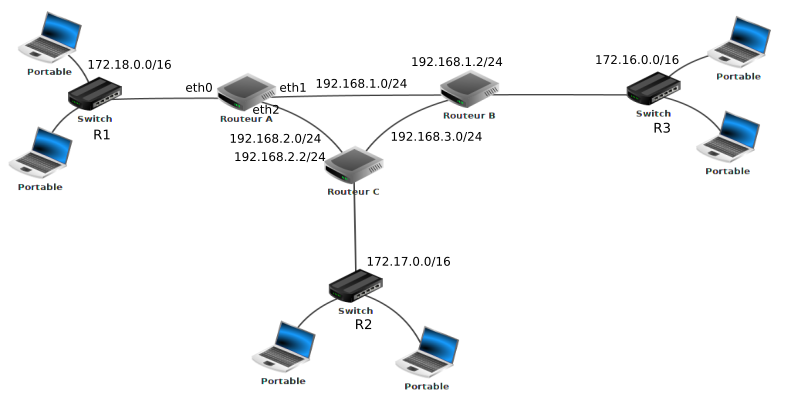

En ajoutant les informations suivantes :
- liaison routeur A - routeur B : 1 Mbps (soit $10^6$ bps)
- liaison routeur A - routeur C : 10 Mbps (soit $10 \times 10^6$ = $10^7$ bps)
- liaison routeur C - routeur B : 10 Mbps (soit $10 \times 10^6$ = $10^7$ bps)

Les coûts seront donc les suivants :
- liaison routeur A - routeur B : $\frac{10^8}{10^6} = 100$
- liaison routeur A - routeur C : $\frac{10^8}{10^7} = 10$
- liaison routeur C - routeur B : $\frac{10^8}{10^7} = 10$

Et donc :
- Routeur A -> Routeur C le coût est de 10
- Routeur A -> Routeur B le coût est de 100
- Routeur A -> Routeur C -> Routeur B le coût est 10+10=20
- Routeur A -> Routeur B -> Routeur C le coût est 100+10=110

Ce qui nous donne la table de routage suivante pour le routeur A :

|Réseau      |Moyen de l'atteindre  |Métrique  |
| :---------- | :---------- | :---------- |
|R1|eth0|0|
|Routeur B|eth1|0|
|Routeur C|eth2|0|
|R2|192.168.2.2/24|10|
|R2|192.168.1.2/24|110|
|R3|192.168.1.2/24|100|
|R3|192.168.2.2/24|20|

- pour un paquet de données allant de R1 à R2, la route privilégiée sera donc : $R1 -> Routeur A -> Routeur C -> R2$.
- pour un paquet de données allant de R1 à R3, la route privilégiée sera donc : $R1 -> Routeur A -> Routeur C -> Routeur B -> R3$ (on constate une différence avec ce que nous avions trouvé avec le protocole RIP).


> **⚠️ Dans certains exercices, le formule du calcul du coût peut varier (on peut rencontrer parfois $ coût = \frac{10^9}{débit}$).  
> Il est donc encore une fois important de bien lire la consigne et les conventions adoptées par chaque exercice.** 
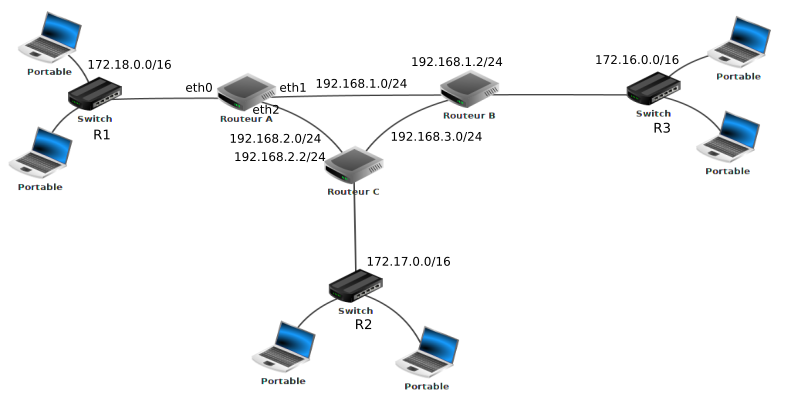

---
### 📝 EXERCICE 3 - Protocole OSPF
---